In [262]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

In [263]:
# Download required NLTK datasets
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/ameet/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/ameet/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/ameet/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [264]:
# Function to clean and preprocess text data
def clean_words(new_tokens):
    new_tokens = [t.lower() for t in new_tokens]
    stop_words = set(stopwords.words('english'))
    new_tokens = [t for t in new_tokens if t not in stop_words]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens = [lemmatizer.lemmatize(t) for t in new_tokens]
    return new_tokens

In [265]:
df = pd.read_csv('../Liar.csv')  # Read the Liar Dataset CSV 

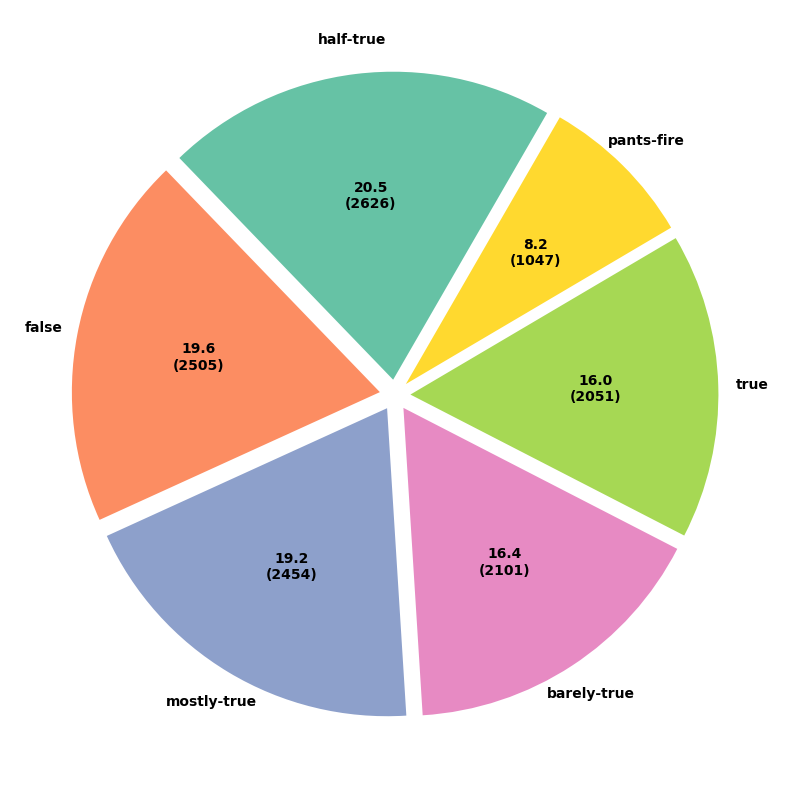

In [266]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

# Define the pie chart
df['label'].value_counts().plot(
    kind='pie', 
    autopct=lambda pct: f'{pct:.1f}\n({int(pct/100.*sum(df["label"].value_counts()))})', 
    startangle=60,
    textprops={'rotation_mode': 'anchor', 'va': 'center', 'ha': 'center', 'weight': 'bold', 'fontsize': 10},
    colors=sns.color_palette('Set2'),
    explode=[0.05] * len(df['label'].value_counts()),
    labeldistance=1.111
)

plt.ylabel('') 
plt.show()


In [267]:
# Create a custom mapping for the labels for binary classification
label_mapping = {
    'true': True,
    'mostly-true': True,
    'half-true': True,
    'barely-true': False,
    'false': False,
    'pants-fire': False
}

df['label'] = df['label'].map(label_mapping)


In [268]:
df['label'].value_counts()

label
True     7133
False    5655
Name: count, dtype: int64

In [269]:
# Check if all values in df['label'] are boolean
all_boolean = df['label'].apply(lambda x: isinstance(x, bool)).all()

if all_boolean:
    print("All values in df['label'] are boolean (True/False).")
else:
    print("Not all values in df['label'] are boolean. There may be other data types present.")


All values in df['label'] are boolean (True/False).


In [270]:
df_test_set = pd.read_csv('../Test_dataset(FINAL).csv')

In [271]:
# Check if all values in df_test_set['Label'] are also boolean
all_boolean = df_test_set['Label'].apply(lambda x: isinstance(x, bool)).all()

if all_boolean:
    print("All values in df['label'] are boolean (True/False).")
else:
    print("Not all values in df['label'] are boolean. There may be other data types present.")

All values in df['label'] are boolean (True/False).


In [272]:
df_test_set

,Headline,Source,Question_phi,Question_Mistral,Label
0,NASA’s Perseverance rover finds its first poss...,sciencenews.org,"""Has NASA's Perseverance rover discovered evid...","""Has NASA officially announced the discovery o...",True
1,Sepsis tests take days putting patients at ri...,sciencenews.org,"""What is the current average wait time for sep...","""Is there a recent study or research that show...",True
2,Nasa's DART asteroid unlocks complex history o...,https://timesofindia.indiatimes.com/,"""What is the history of NASA's DART mission an...","""Has NASA's DART mission provided evidence of ...",True
3,Say goodbye to back pain patients go for adva...,https://timesofindia.indiatimes.com/,"""What are the benefits of advanced endoscopy s...","""Has 'advanced endoscopy spine surgery for sci...",True
4,Neurodivergent children more likely to develop...,https://timesofindia.indiatimes.com/,"""What does the study find about the likelihood...","""Is there a peer-reviewed study titled 'Neurod...",True
...,...,...,...,...,...
683,"""Google's parent company faces UK investigatio...",Synthetically Generated,"""Has Google's parent company been investigated...","""Has Alphabet Inc., Google's parent company, b...",False
684,"""Intel announces hiring spree to fund recovery...",Synthetically Generated,"""What is the current hiring status of Intel as...","""Has Intel announced a hiring spree to fund re...",False
685,"""Ola Electric IPO grey market premium skyrocke...",Synthetically Generated,"""What is the current grey market premium for O...","""Has the Ola Electric IPO grey market premium ...",False
686,"""Japan's Nikkei 225 Index Soars 12.4%, Its Big...",Synthetically Generated,"""What was the percentage increase in Japan's N...","1. ""Is there a news article from a reliable so...",False


In [273]:
X = [' '.join(clean_words(word_tokenize(text))) for text in df['statement']]
y = df['label']

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_vectorized = vectorizer.fit_transform(X)

clf = LinearSVC(max_iter=1000)
clf.fit(X_vectorized, y)

df_test_set['cleaned_headline'] = df_test_set['Headline'].apply(lambda x: ' '.join(clean_words(word_tokenize(x))))
X_test_set_vectorized = vectorizer.transform(df_test_set['cleaned_headline'])

y_test_set = df_test_set['Label']
y_test_set_pred = clf.predict(X_test_set_vectorized)
df_test_set['LinearSVC Model Decision'] = y_test_set_pred # Store model decisions to the test DataFrame

accuracy = accuracy_score(y_test_set, y_test_set_pred)
print(f"LinearSVC Model Accuracy on Test Set: {accuracy * 100:.2f}%")

precision = precision_score(y_test_set, y_test_set_pred)
recall = recall_score(y_test_set, y_test_set_pred)
f1 = f1_score(y_test_set, y_test_set_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

conf_matrix = confusion_matrix(y_test_set, y_test_set_pred)

print("\nConfusion Matrix:")
print(conf_matrix)


LinearSVC Model Accuracy on Test Set: 49.13%
Precision: 0.49
Recall: 0.49
F1-Score: 0.49

Confusion Matrix:
[[168 176]
 [174 170]]


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [274]:
# Reorder DF Columns
df_test_set = df_test_set[['Headline', 'cleaned_headline', 'Source', 'Question_phi', 'Question_Mistral', 'Label', 'LinearSVC Model Decision']]

In [275]:
df_test_set.to_csv("Classical_ml_EVAL.csv", index=False)

In [276]:
def predict_headline(headline, vectorizer, model):
    # Clean and preprocess the headline
    cleaned_headline = ' '.join(clean_words(word_tokenize(headline)))
    headline_vectorized = vectorizer.transform([cleaned_headline])
    prediction = model.predict(headline_vectorized)[0]
    result = "True" if prediction else "False"
    return result

# Example usage
headline = "Paris 2024 Olympics: Leon Marchand fails to achieve any medals in the competition."
result = predict_headline(headline, vectorizer, clf)
print(f"Prediction for the headline: {result}")

Prediction for the headline: True
